**линейный классификатор**

правило Розенблатта  

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from time import time

def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
n_samples = 500
n_clst = 2 # количество классов

X,y = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        random_state=get_seed(),
        cluster_std=[1.0,1.5,]
    )

In [4]:
X.shape, y.shape

((500, 2), (500,))

In [5]:
# значение y это 1 или 0

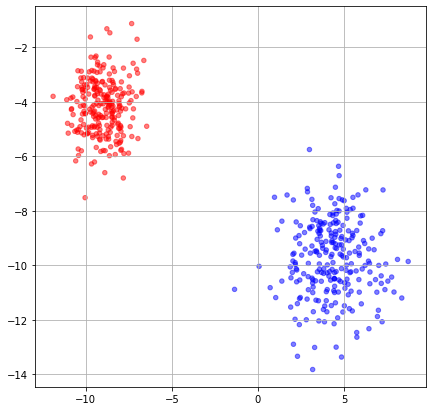

In [6]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [7]:
# биннаризация X

In [8]:
n=50
b = np.vstack([ np.linspace(X[:,j].min()-1,X[:,j].max()+1,n) for j in range(X.shape[1]) ])

In [9]:
# b

In [10]:
Xp = np.hstack([
    np.hstack([ ( (b[j,i]<X[:,j])&(X[:,j]<b[j,i+1]) ).astype(int).reshape(X.shape[0],1) 
    for i in range(b.shape[1]-1) ])
    for j in range(X.shape[1])
])

Xp.shape

(500, 98)

In [11]:
# Xp

---

In [12]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([ 0.03530672,  0.19062767, -0.02739776, -0.15249234,  0.16510649,
        0.14388878, -0.01759   ,  0.20788566,  0.13541467, -0.05474006,
       -0.02358681,  0.03634968,  0.0535371 , -0.05947178,  0.14397264,
       -0.12447588, -0.05864201, -0.23047134, -0.01164172,  0.06166744,
        0.15896374, -0.01023035, -0.04223548, -0.10948633, -0.10769054,
        0.03502363, -0.02852211,  0.09044876,  0.05878232,  0.05347588,
        0.20121682,  0.10508725,  0.14642186,  0.11377315,  0.12975065,
       -0.14241628,  0.10043131, -0.13498235, -0.06813686,  0.14231195,
       -0.09211392, -0.07812921, -0.16845618,  0.06361715, -0.15649702,
        0.13595923, -0.04132456, -0.01320855, -0.07668647,  0.14224186,
        0.04683589,  0.00546567,  0.01594796,  0.01770028,  0.01994489,
        0.08376525,  0.05915552,  0.16140985, -0.05277462,  0.0758139 ,
       -0.05744918,  0.07528414, -0.08134065, -0.11752682,  0.03508329,
        0.02983082, -0.21570171,  0.01519931,  0.01619125,  0.07

In [13]:
def loss(x,w,y): return -x.dot(w)*y    

In [14]:
MAX_ITER = 20 # максимальное число циклов обучения

# ERROR_BOUND = -Xp.shape[0]*0.99 # порог ошибки (количество ошибок)
ERROR_BOUND = -3.1

a=0.7 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [15]:
q = loss(Xp,W,y).sum()
er_hist.append( q )

In [16]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):
    if stop: break
    for j in np.random.permutation(Xp.shape[0]):
        
        if er_hist[-1] < ERROR_BOUND: # проверяем достижение порога
            print( 'error bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break

        xj,yj = Xp[j,:],y[j]
        
        r = (xj.dot(W)>0.5).astype(int) # выход
        W = W - a * xj.T.dot(r-y[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        er_hist.append( q )  
        

In [17]:
print(W)
print(len(er_hist),er_hist[-1],min(er_hist))

[ 0.03530672  0.19062767 -0.02739776 -0.15249234  0.16510649  0.14388878
 -0.71759     0.20788566  0.13541467 -0.05474006 -0.02358681  0.03634968
  0.0535371  -0.05947178  0.14397264 -0.12447588 -0.05864201 -0.23047134
 -0.01164172  0.06166744  0.15896374 -0.01023035 -0.04223548 -0.10948633
 -0.10769054  0.03502363 -0.02852211  0.09044876  0.05878232  0.75347588
  0.90121682  0.80508725  0.84642186  0.81377315  0.82975065  0.55758372
  0.80043131  1.26501765  0.63186314  0.84231195  0.60788608  0.62187079
  1.23154382  0.76361715  0.54350298  0.83595923 -0.04132456 -0.01320855
 -0.07668647  0.14224186  0.04683589  0.00546567  0.01594796  0.01770028
  0.01994489  0.08376525  0.05915552  0.16140985  0.64722538  0.7758139
  0.64255082  0.77528414  0.61865935  1.28247318  0.73508329  0.72983082
  1.18429829  0.71519931  0.71619125  0.77787599  0.61433441  0.80438613
  0.75770341 -0.00316513  0.72253439  0.09369663  0.05431725  0.02005646
  0.03932985 -0.06802772 -0.02088367 -0.0992893  -0.

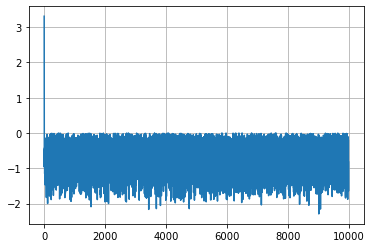

In [18]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [19]:
o = Xp.dot(W)

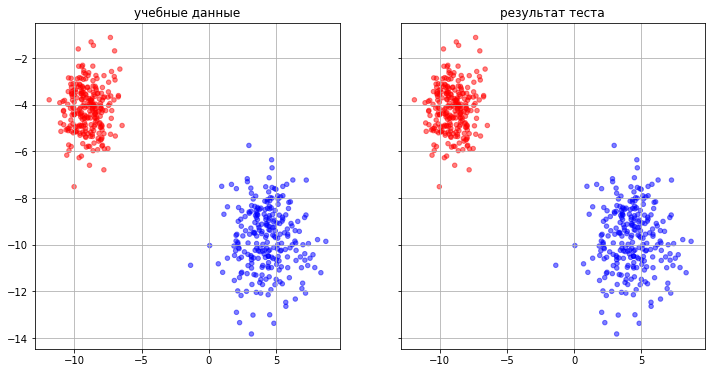

In [20]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0.5) else 'r' for j in o ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
